<a href="https://colab.research.google.com/github/EmoreiraV/RUoG/blob/main/Week4_Review_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 - Efficient data management using `tidyverse`

**Programming Quiz 1**

A reminder that the first programming quiz is now live. This is due on Friday 20th October. You will have 2 hours to attempt the quiz once you begin. The quiz is based on weeks 1-3 materials.

# Week 4 Outline

In Week 4, we cover efficient data management in R using the `tidyverse` package. Specifically, we will take a look at:



*   Using pipelines for operations
*   Using tibbles for data storage
*   Reading in data with `readr`
*   Reshaping data using `tidyr`



# `tidyverse`

This week, we will be using the `tidyverse`, library, which consists of a suite of different packages.

The philosophy of `tidyverse` is that it consists of a set of packages and functions which work in harmony with one another as they share common data representations and design.

The packages within `tidyverse` are meant to be used for everyday data analysis, covering data reading, manipulation, data cleaning and visualisation (more of this in Week 6).

There are some libraries within `tidyverse` that we will not cover in the course, but you may see their use in other courses on the programme.

# Pipelines

Pipelines are a key component of all the `tidyverse` packages. The `magrittr` package provides a forward pipe operator for R.

Pipelines allow us to reconstruct function calls in a much cleaner fashion, improving readability of code. They are particularly useful for nested function calls.

A forward pipe is called in R using `%>%`. This is the most common type of pipe in R.

In [ ]:
f <- function(y) {
  y + y^2
}

y <- 2
f(y)

library(magrittr)
y %>% f

set.seed(1000)
min(cos(rnorm(500)))

set.seed(1000)
rnorm(500) %>% cos() %>% min()

[1] 6

[1] 6

[1] -0.8908784

[1] -0.8908784

There are additional pipe operators available:



*   `%$%` can be used to make variables in a data set visible to the right hand side expression
*   `$<>$` can be used to store the result on the right hand side in the variable on the left hand side. Care should be taken when using this operator!





In [ ]:
mtcars1 <- mtcars %>%
  subset(wt <= 4)

cor(mtcars1$disp,mtcars1$hp)

mtcars %>%
subset(wt <= 4) %$%
  cor(disp,hp)


mtcars1 <- mtcars %>%
  subset(wt <= 4)

mtcars %<>%
  subset(wt <= 4)

  mtcars

[1] 0.7832567

[1] 0.7832567

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


# Tibbles

The `tibble` package provides us with the `tbl_df()` function, which is a more modern version of a data frame.

Tibbles can store anything. We can have multiple values per cell, unlike in a data frame.

Data frames can be converted to tibbles using the `as_tibble()` function.

In [ ]:
library(dplyr)

head(starwars)

head(starwars[c("name","starships")])

kids <- data.frame(name=c("Sarah","John"), age = c(4,10), weight = c(15, 30))
kids

kids <- as_tibble(kids)
kids

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


name,starships
<chr>,<list>
Luke Skywalker,"X-wing , Imperial shuttle"
C-3PO,
R2-D2,
Darth Vader,TIE Advanced x1
Leia Organa,
Owen Lars,


name,age,weight
<chr>,<dbl>,<dbl>
Sarah,4,15
John,10,30


name,age,weight
<chr>,<dbl>,<dbl>
Sarah,4,15
John,10,30


Row names are not visible in a tibble. You can add these to the tibble using the `rownames_to_column` command.

Tibbles can be created using the `tibble` command. These are assembled on a column basis. `tribble` can be used to create a tibble on a row basis.

Tibbles behave similarly to data frames, and the same subsetting commands can be used.

Columns can be accessed using their full name. Rows can only be accessed by index.

Tibbles are more restrictive than data frames, and often prevent us from carrying out certain tasks. Tibbles are "lazy and surly" - they do less and complain a (lot!) more. This is a design principle to make you construct more cleaner and expressive code, and find issues earlier.

Subsetting a tibble will always result in another tibble

In [ ]:
kids[,1]

name
<chr>
Sarah
John


# Reading in data with `readr`

The `readr` package contains alternatives to several of the base R functions for reading in data.

These functions are often a lot faster than their base equivalents, and provide helpful loading outputs for inspection.

`read_csv()` reads in comma separated files. `read_delim()` is similar to `read_table()`, but the delimiter value needs to be specified.

In [ ]:
library(readr)
read_csv("https://github.com/UofGAnalyticsData/R/raw/main/Week%203/cars.csv", na="*")


Rows: 20 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Manufacturer, Model
dbl (3): MPG, Displacement, Horsepower

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Manufacturer,Model,MPG,Displacement,Horsepower
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Chevrolet,Camaro,19,3.4,160
Oldsmobile,Achieva,NA,2.3,155
Dodge,Spirit,22,2.5,100
Chevrolet,Astro,NA,4.3,165
Chevrolet,Corsica,25,2.2,110
Volkswagen,Corrado,18,2.8,178
Dodge,Stealth,18,3.0,300
Volkswagen,Fox,25,1.8,81
Cadillac,DeVille,16,4.9,200


We can also specify the intended data type for a column with data we read in too using the `col_types` command

In [ ]:
read_csv("https://github.com/UofGAnalyticsData/R/raw/main/Week%203/cars.csv", na="*",col_types="ccidi")

Manufacturer,Model,MPG,Displacement,Horsepower
<chr>,<chr>,<int>,<dbl>,<int>
Chevrolet,Camaro,19,3.4,160
Oldsmobile,Achieva,NA,2.3,155
Dodge,Spirit,22,2.5,100
Chevrolet,Astro,NA,4.3,165
Chevrolet,Corsica,25,2.2,110
Volkswagen,Corrado,18,2.8,178
Dodge,Stealth,18,3.0,300
Volkswagen,Fox,25,1.8,81
Cadillac,DeVille,16,4.9,200


# Efficient data manipulation using `dplyr`

All of the functions within the `dplyr` package are designed to be used with tibbles, but you can also use these functions with data frames if you wish.

We can select observations using the `filter()` function. With this function, we specify a particular column entry we wish to filter by. `subset()` is the equivalent function in base R.

In [ ]:
load(url("https://github.com/UofGAnalyticsData/R/raw/main/Week%204/velib"))

head(stations)
head(bikes)

library(dplyr)

stations_Marne <- stations %>%
  filter(departement=="Val-de-Marne")

head(stations_Marne)

,name,id,address,lng,lat,departement
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,PORT SOLFERINO (STATION MOBILE),901,"BERGES DE SEINE, SOUS LA PASSERELLE SENGHOR AU PORT DE SOLFERINO - 75007 PARIS",2.324420,48.86138,Paris
2,QUAI MAURIAC / PONT DE BERCY,903,FETE DE L'OH (BERCY) - QUAI MAURIAC ANG PONT DE BERCY - 75013 PARIS,2.374341,48.83713,Paris
3,17/19 PLACE JOFFRE / ECOLE MILITAIRE,904,ECOLE MILITAIRE-AVENUE DE LA MOTTE PICQUET - 75007 PARIS,2.301919,48.85218,Paris
4,CONCORDE/BERGES DE SEINE (STATION MOBILE),905,"BERGES DE SEINE, BAS DE LA BRETELLE AVAL CONCORDE - 75007 PARIS",2.316318,48.86315,Paris
5,PORT DU GROS CAILLOU (STATION MOBILE),908,"BERGES DE SEINE, ESCALIER PORT DU GROS CAILLOU - 75007 PARIS",2.306366,48.86290,Paris
6,PONT D'ARCOLE (STATION MOBILE),909,Voie Georges Pompidou - 75004 PARIS,2.350783,48.85584,Paris


,name,available_bikes,available_bike_stands,time
,<chr>,<int>,<int>,<dbl>
1,CHAMPEAUX (BAGNOLET),9,41,13
2,POISSONNIÈRE - ENGHIEN,33,0,13
3,METRO ROME,6,38,13
4,DE GAULLE (PANTIN),2,16,13
5,PARC DE BELLEVILLE (20040),4,22,13
6,SOLJENITSYNE (PUTEAUX),56,4,13



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




name,id,address,lng,lat,departement
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
DOUMER (ARCUEIL),41101,FACE AU 11 AVENUE PAUL DOUMER - 94110 ARCUEIL,2.336710,48.80638,Val-de-Marne
RENAN (ARCUEIL),41102,rue Ernest Renan / angle rue Vaucouleurs (A la sortie du RER B) - 94110 ARCUEIL,2.334690,48.80880,Val-de-Marne
BRIAND (ARCUEIL),41103,AVENUE ARISTIDE BRIAND (CARREFOUR VACHE NOIRE) - 94110 ARCUEIL,2.326970,48.81042,Val-de-Marne
DE RICARD (FONTENAY SOUS BOIS),41201,RUE LOUIS-XAVIER DE RICARD - 94120 FONTENAY SOUS BOIS,2.472409,48.84630,Val-de-Marne
CHARMES (FONTENAY SOUS BOIS),41202,ANGLE AVENUE DES CHARMES / AVENUE FOCH - 94120 FONTENAY SOUS BOIS,2.463083,48.84367,Val-de-Marne
STALINGRAD (FONTENAY SOUS BOIS),41203,14 AVENUE STALINGRAD - 94120 FONTENAY SOUS BOIS,2.455529,48.85013,Val-de-Marne


If you want to select observations by a specific row number, the `slice()` command can be used (similarly to the [x,] command).



In [ ]:
stations %>%
  slice(1:4)

stations[1:4,]

name,id,address,lng,lat,departement
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
PORT SOLFERINO (STATION MOBILE),901,"BERGES DE SEINE, SOUS LA PASSERELLE SENGHOR AU PORT DE SOLFERINO - 75007 PARIS",2.324420,48.86138,Paris
QUAI MAURIAC / PONT DE BERCY,903,FETE DE L'OH (BERCY) - QUAI MAURIAC ANG PONT DE BERCY - 75013 PARIS,2.374341,48.83713,Paris
17/19 PLACE JOFFRE / ECOLE MILITAIRE,904,ECOLE MILITAIRE-AVENUE DE LA MOTTE PICQUET - 75007 PARIS,2.301919,48.85218,Paris
CONCORDE/BERGES DE SEINE (STATION MOBILE),905,"BERGES DE SEINE, BAS DE LA BRETELLE AVAL CONCORDE - 75007 PARIS",2.316318,48.86315,Paris


name,id,address,lng,lat,departement
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
PORT SOLFERINO (STATION MOBILE),901,"BERGES DE SEINE, SOUS LA PASSERELLE SENGHOR AU PORT DE SOLFERINO - 75007 PARIS",2.324420,48.86138,Paris
QUAI MAURIAC / PONT DE BERCY,903,FETE DE L'OH (BERCY) - QUAI MAURIAC ANG PONT DE BERCY - 75013 PARIS,2.374341,48.83713,Paris
17/19 PLACE JOFFRE / ECOLE MILITAIRE,904,ECOLE MILITAIRE-AVENUE DE LA MOTTE PICQUET - 75007 PARIS,2.301919,48.85218,Paris
CONCORDE/BERGES DE SEINE (STATION MOBILE),905,"BERGES DE SEINE, BAS DE LA BRETELLE AVAL CONCORDE - 75007 PARIS",2.316318,48.86315,Paris


The `select()` function can be used to subset the columns of a data set. You can either supply the columns to keep, or the ones to remove (using a - sign).

In [ ]:
bikes_subset <- bikes %>%
  select(name,time)

head(bikes_subset)

name,time
<chr>,<dbl>
CHAMPEAUX (BAGNOLET),13
POISSONNIÈRE - ENGHIEN,13
METRO ROME,13
DE GAULLE (PANTIN),13
PARC DE BELLEVILLE (20040),13
SOLJENITSYNE (PUTEAUX),13


The `mutate()` function can be used to add new variables to a data set (just like `transform()`).

We can also order data sets by one or more variables by using `arrange()`

In [ ]:
bikes <- bikes %>%
  mutate(total_stands = available_bikes + available_bike_stands)

bikes %>%
  arrange(available_bike_stands)

name,available_bikes,available_bike_stands,time,total_stands
<chr>,<int>,<int>,<dbl>,<int>
POISSONNIÈRE - ENGHIEN,33,0,13,33
MUSÉE D'ORSAY,65,0,13,65
KARMAN (AUBERVILLIERS),0,0,13,0
ROND POINT DES CHAMPS ELYSEES,0,0,13,0
PORT SOLFERINO (STATION MOBILE),20,0,13,20
CITE RIVERIN,17,0,13,17
MAZET SAINT ANDRE DES ARTS,54,0,13,54
VAUGIRARD PRINCE,24,0,13,24
SAINT MICHEL DANTON,34,0,13,34


We can group observations by a particular variable using the `group_by()` function.

This can be very useful for when we want to gather specific summary statistics on a group, where we can use `summarise()`

In [ ]:
stations %>%
  group_by(departement) %>%
  summarise(n_stations=n()) %>%
  arrange(desc(n_stations))

departement,n_stations
<chr>,<int>
Paris,743
Hauts-de-Seine,75
Seine-Saint-Denis,60
Val-de-Marne,50


As mentioned last week, we often want to merge different data sets together. The `join()` family of functions in `dplyr` provides a lot of flexibility in how we can do this.



In [ ]:
bike_station <- bikes %>% inner_join(stations)

head(bike_station)

Joining with `by = join_by(name)`


name,available_bikes,available_bike_stands,time,total_stands,id,address,lng,lat,departement
<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
CHAMPEAUX (BAGNOLET),9,41,13,50,31705,RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) - 93170 BAGNOLET,2.416171,48.86453,Seine-Saint-Denis
POISSONNIÈRE - ENGHIEN,33,0,13,33,10042,52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISSONIERE - 75010 PARIS,2.348395,48.87242,Paris
METRO ROME,6,38,13,44,8020,74 BOULEVARD DES BATIGNOLLES - 75008 PARIS,2.319860,48.88215,Paris
DE GAULLE (PANTIN),2,16,13,18,35014,139 AVENUE JEAN LOLIVE / MAIL CHARLES DE GAULLE - 93500 PANTIN,2.412716,48.89327,Seine-Saint-Denis
PARC DE BELLEVILLE (20040),4,22,13,26,20040,57 & 36 RUE JULIEN LACROIX - 75020 PARIS,2.384222,48.87039,Paris
SOLJENITSYNE (PUTEAUX),56,4,13,60,28002,BOULEVARD ALEXANDRE SOLJENITSYNE - 92800 PUTEAUX,2.247721,48.88448,Hauts-de-Seine


# Reshaping data using `tidyr`

For data to be 'tidy', it needs to be arranged such that each column corresponds to exactly one variable across units and each row corresponds to one observational unit.

Typically we sort data into either 'long' or 'wide' format.

The function `pivot_longer()` reads data from multiple columns and organises them as key-value pairs, making it 'longer'

The `pivor_wider()` function allows us to spread the data stored in one column across several columns (making it 'wider')

Deciding whether you want your data to be 'long' or 'wide' can depend on what tasks you want to perform with your data. We will see the importance  of this when we look at plotting in more detail.

In [ ]:
library(tidyr)
Orange %>% pivot_wider(names_from = Tree,values_from=circumference,names_prefix="Tree_")

age,Tree_1,Tree_2,Tree_3,Tree_4,Tree_5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
118,30,33,30,32,30
484,58,69,51,62,49
664,87,111,75,112,81
1004,115,156,108,167,125
1231,120,172,115,179,142
1372,142,203,139,209,174
1582,145,203,140,214,177


# Review Task

**Voting patterns in the EU referendum**

In this task, you will work with the data on the EU referendum and relate it to the results of the 2015 General Election. The challenge however is that the results from the EU referendum are only available on a local authority basis, whereas the results for the General Election are only available at constituency level. Though constituencies and local authorities sometimes coincide, this is not generally the case.

For the General Election, we thus need to estimate the result in a local authority by combining the results from the constituencies it overlaps with.

You can download the data using

In [ ]:
load(url(paste("https://github.com/UofGAnalyticsData/R/raw/",
"main/Week%204/EURef.RData",sep="")))

(Consult the Week 4 review handout for how to calculate the estimate vote share of a party in a local authority)

The data required in this task are contained in the data frames genelec and wards.

Augment the data set brexit so that it also contains the vote shares for each party on a local authority basis.

In [ ]:
head(brexit)

,LACode,LAName,Region,Leave,EUMigrants
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,E07000223,Adur,South East,54.57,2.781864
2,E07000026,Allerdale,North West,58.65,1.400095
3,E07000032,Amber Valley,East Midlands,60.28,1.620486
4,E07000224,Arun,South East,62.48,5.285651
5,E07000170,Ashfield,East Midlands,69.84,1.736445
6,E07000105,Ashford,South East,59.43,3.721727


In [ ]:
head(genelec)

,ConstituencyCode,ConstituencyName,Country,ConVote,LabVote,LDVote,UKIPVote,GreenVote,TotalVote,Electorate
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,W07000049,Aberavon,Wales,3742,15416,1397,4971,711,31523,49821
2,W07000058,Aberconwy,Wales,12513,8514,1391,3467,727,30148,45540
7,E14000530,Aldershot,England,23369,8468,4076,8253,2025,46191,72434
8,E14000531,Aldridge-Brownhills,England,20558,8835,1330,7751,826,39497,60215
9,E14000532,Altrincham and Sale West,England,26771,13481,4235,4047,1983,50517,72004
10,W07000043,Alyn and Deeside,Wales,13197,16540,1733,7260,976,41314,62016


In [ ]:
head(wards)

,WardCode,WardName,ConstituencyCode,LACode,Population,Electorate
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,E05000026,Abbey,E14000540,E09000002,13757,7765
2,E05000027,Alibon,E14000540,E09000002,11102,6267
3,E05000028,Becontree,E14000540,E09000002,13017,7347
4,E05000029,Chadwell Heath,E14000657,E09000002,10606,6877
5,E05000030,Eastbrook,E14000657,E09000002,11117,7208
6,E05000031,Eastbury,E14000540,E09000002,12114,6838


**Solution**

We start by augmenting the ward data by the estimated number of votes for each party and turnout.

In [ ]:
library(tidyverse)

wards_extended <- wards %>% inner_join(genelec, by="ConstituencyCode", suffix=c("Ward","Const")) %>% mutate(ConVote=ConVote/ElectorateConst*ElectorateWard,
LabVote=LabVote/ElectorateConst*ElectorateWard,
LDVote=LDVote/ElectorateConst*ElectorateWard,
UKIPVote=UKIPVote/ElectorateConst*ElectorateWard,
GreenVote=GreenVote/ElectorateConst*ElectorateWard,
TotalVote=TotalVote/ElectorateConst*ElectorateWard)

wards_extended

WardCode,WardName,ConstituencyCode,LACode,Population,ElectorateWard,ConstituencyName,Country,ConVote,LabVote,LDVote,UKIPVote,GreenVote,TotalVote,ElectorateConst
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
E05000026,Abbey,E14000540,E09000002,13757,7765,Barking,England,736.4809,2604.912,58.96884,1002.4703,92.23062,4514.264,74004
E05000027,Alibon,E14000540,E09000002,11102,6267,Barking,England,594.4013,2102.380,47.59275,809.0768,74.43777,3643.386,74004
E05000028,Becontree,E14000540,E09000002,13017,7347,Barking,England,696.8352,2464.686,55.79447,948.5060,87.26573,4271.255,74004
E05000029,Chadwell Heath,E14000657,E09000002,10606,6877,Dagenham and Rainham,England,1044.9606,1775.796,71.41029,1279.8078,80.27433,4287.605,69049
E05000030,Eastbrook,E14000657,E09000002,11117,7208,Dagenham and Rainham,England,1095.2561,1861.267,74.84737,1341.4068,84.13805,4493.974,69049
E05000031,Eastbury,E14000540,E09000002,12114,6838,Barking,England,648.5585,2293.933,51.92903,882.7935,81.21996,3975.343,74004
E05000032,Gascoigne,E14000540,E09000002,12551,7084,Barking,England,671.8907,2376.458,53.79720,914.5524,84.14188,4118.358,74004
E05000033,Goresbrook,E14000540,E09000002,11826,6676,Barking,England,633.1934,2239.587,50.69877,861.8791,79.29577,3881.162,74004
E05000034,Heath,E14000657,E09000002,11382,7380,Dagenham and Rainham,England,1121.3915,1905.681,76.63341,1373.4160,86.14578,4601.211,69049


We now aggregate the ward data by local authority and divide by the total (estimated) numbers of votes cast.

In [ ]:
la_shares <- wards_extended %>% group_by(LACode) %>%summarise(ConVote=sum(ConVote)/sum(TotalVote),
LabVote=sum(LabVote)/sum(TotalVote),
LDVote=sum(LDVote)/sum(TotalVote),
UKIPVote=sum(UKIPVote)/sum(TotalVote),
GreenVote=sum(GreenVote)/sum(TotalVote))

la_shares

LACode,ConVote,LabVote,LDVote,UKIPVote,GreenVote
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E06000001,0.2090656,0.35644467,0.01927070,0.27986832,0.03395796
E06000002,0.2472925,0.50883604,0.03607391,0.17272565,0.03507185
E06000003,0.2386435,0.43181856,0.12941810,0.17197566,0.02213076
E06000004,0.3862403,0.42258778,0.02462569,0.14294939,NA
E06000005,0.3447822,0.43416758,0.04622107,0.13547020,0.03462303
E06000006,0.2313309,0.58327778,0.02550359,0.13146166,0.02314775
E06000007,0.3696121,0.42853052,0.04978429,0.12089108,0.02891040
E06000008,0.3332464,0.49642907,0.02005798,0.14186750,NA
E06000009,0.3879165,0.39046971,0.02345000,0.16121543,0.02435190


In [ ]:
la_shares <- wards_extended %>% group_by(LACode) %>%
summarise_at(vars(ConVote:GreenVote), funs(sum(.)/sum(TotalVote)))
head(la_shares)

ERROR: ignored

dplyr provides the functions mutate_at and summarise_at, which allow for applying the same transformation to a
number of column in one go.

In [ ]:
wards_extended <- wards %>% inner_join(genelec, by="ConstituencyCode", suffix=c("Ward","Const")) %>%
mutate_at(vars(ConVote:TotalVote), funs(./ElectorateConst*ElectorateWard))

ERROR: ignored

We can now for example plot the Leave vote against the UKIP vote.

Joining, by = "LACode"


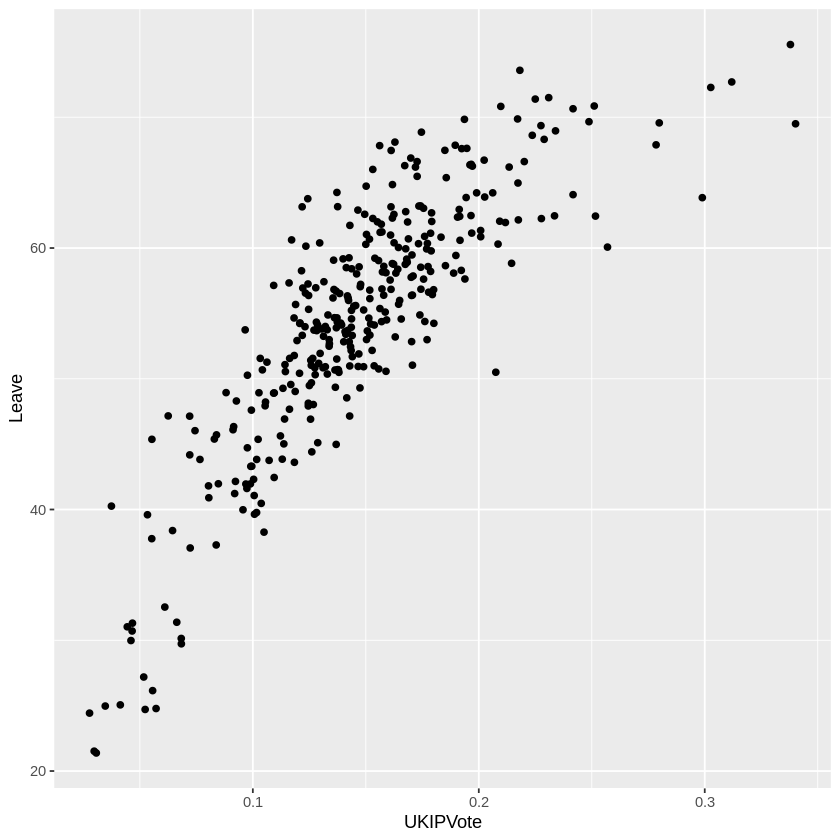

In [ ]:
qplot(UKIPVote,Leave,data=brexit %>%inner_join(la_shares))